In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
#Let's start with importing necessary libraries

import statsmodels.api as sm 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\rt\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\rt\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.shape

(506, 13)

In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
# Percentage and Sum of Missing values in each Columns
missing_data = pd.DataFrame({'total_missing': bos.isnull().sum(), 'perc_missing': (bos.isnull().sum()/bos.shape[0])*100})
missing_data

,total_missing,perc_missing
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [19]:
bos.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [6]:
bos.describe()

,count,mean,std,min,25%,50%,75%,max
0,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
1,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
2,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
3,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
4,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
5,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
6,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
7,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
8,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
9,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
x=bos.drop(['PRICE'],axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y=bos['PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

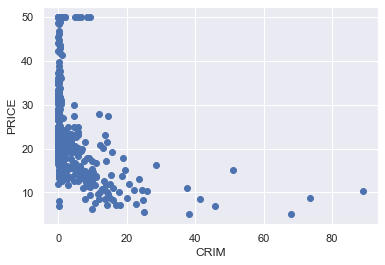

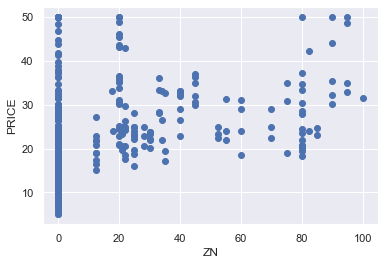

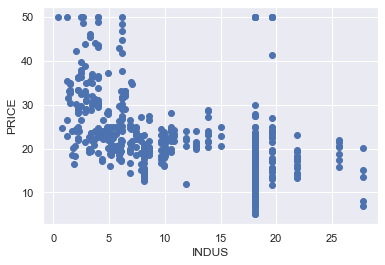

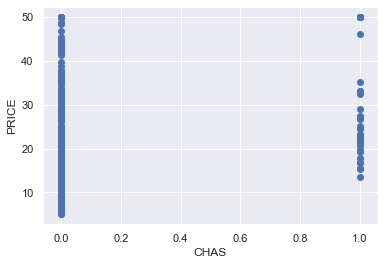

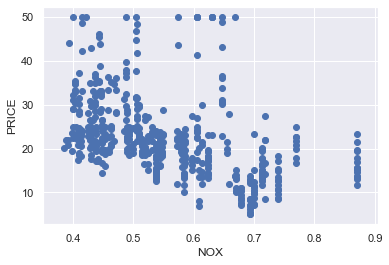

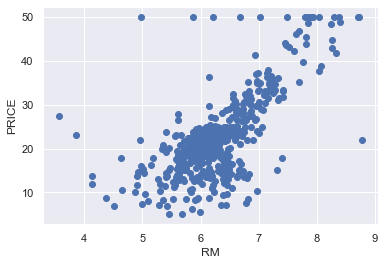

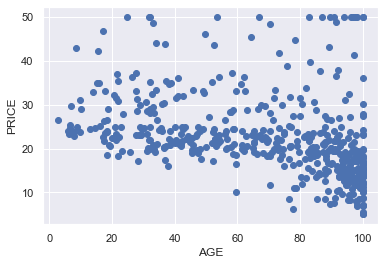

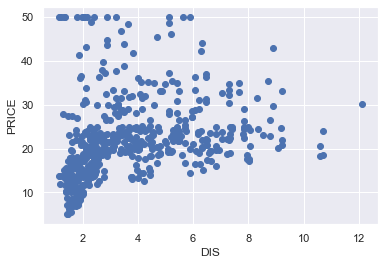

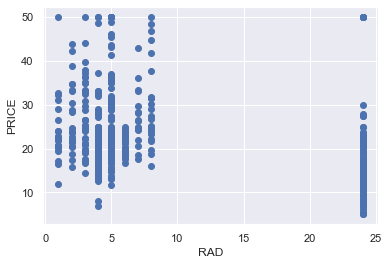

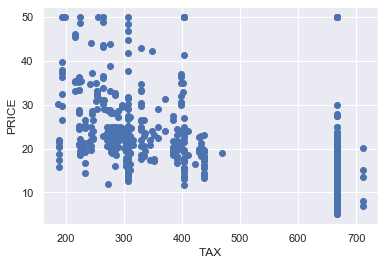

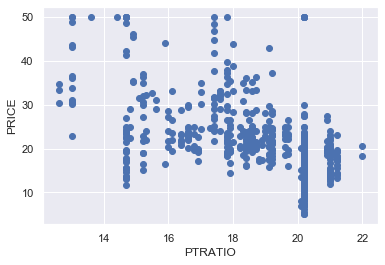

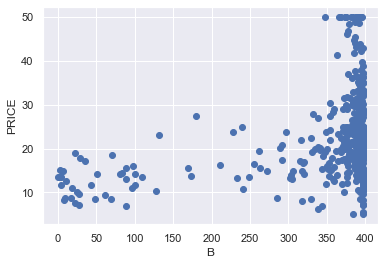

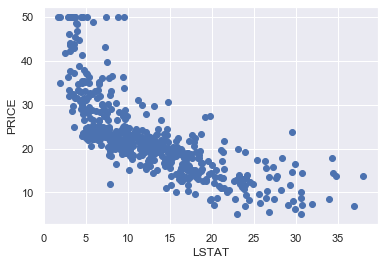

In [14]:
for col in x.columns:
    if (col != ['PRICE']):
        plt.scatter(x[col],y)
        plt.xlabel(col)
        plt.ylabel('PRICE')
        plt.show()
        

In [15]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

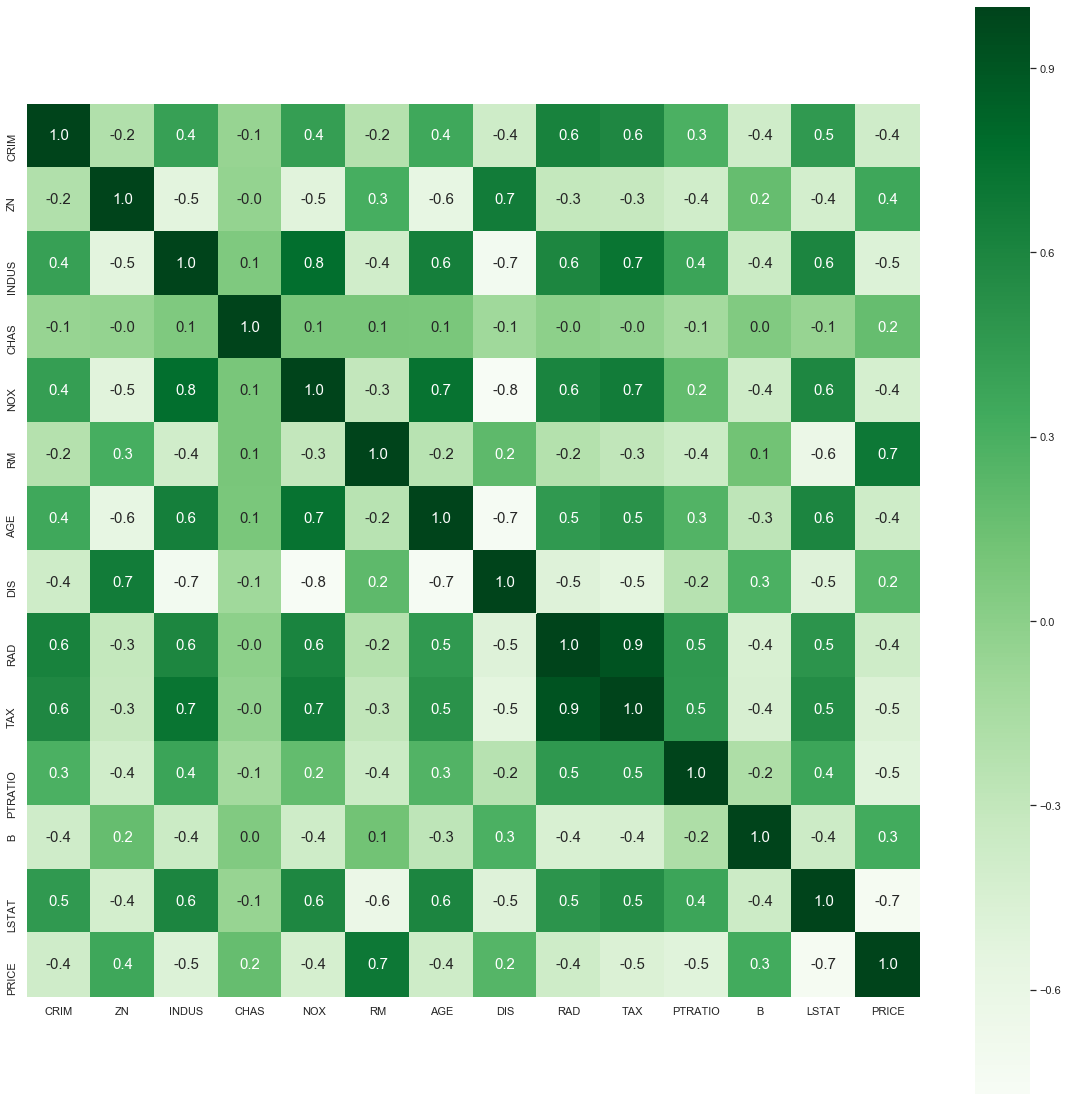

In [22]:
# Finding out the correlation between the features
corr = bos.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [18]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

In [25]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred_train=lr.predict(x_train)

In [50]:
#Model Evaluation for train data
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred_train))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

R^2: 0.7306475313474942
Adjusted R^2: 0.7210541557516514
MAE: 3.328444145891793
MSE: 22.282092126271714
RMSE: 4.720391098867943


In [26]:
# Model prediction on test data
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([11.79886391, 19.00724158, 30.15569938, 23.81625725,  7.00534939,
       24.01290538, 21.02158353, 19.21841711, 43.38294937, 20.62413868,
       26.39616804, 24.04618789, 25.85260347, 17.78208867, 10.52963272,
       33.08009466, 19.30539588, 18.92674579, 24.76923676, 17.35773232,
       19.5632307 , 23.36138113, 32.82075534, 24.93259125, 35.84221429,
       24.64559059, 28.16741177, 34.69448848, 20.65277854, 26.8055867 ,
       21.23512834, 24.86286988, 15.71185577, 20.93978319, 19.14806908,
       24.29673876, 36.95320988, 18.6179615 , 30.29335952, 32.0199193 ,
       22.9310251 , 14.66434179, 19.20891563, 19.50024246, 19.91516961,
       20.22064886, 30.3688808 , 17.65387271, 22.77246687, 18.06842241,
       17.07955317, 19.45278114, 15.35162788, 30.15549026, 46.23137542,
        6.5967418 , 41.02477652, 26.54080841, 16.39023991, 22.4277114 ,
       10.12164792, 23.04344969, 12.70047754, 22.17969611, 24.64430723,
        9.97170547, 27.51050764, 27.18312045, 18.14359002, 22.08

In [46]:
#Model Evaluation for test data
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7519030329262334
Adjusted R^2: 0.7233609039708444
MAE: 3.0427276392999554
MSE: 22.178426943709905
RMSE: 4.70939772621828


Text(0.5, 1.0, 'Prices vs Predicted prices: Y vs Y1')

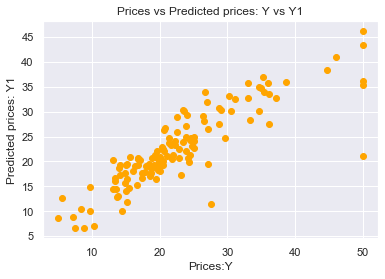

In [71]:
plt.scatter(y_test, y_pred, color ="Orange") 
plt.xlabel("Prices:Y") 
plt.ylabel("Predicted prices: Y1") 
plt.title("Prices vs Predicted prices: Y vs Y1")

In [49]:
lr.score(x_train,y_train)

0.7306475313474942

In [34]:
lr.score(x_test,y_test)

0.7519030329262334

In [51]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [53]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
lasso_reg.score(x_test, y_test)

0.7518957038694828

In [55]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

C:\Users\rt\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([6.28073686, 2.17754951, 5.73892313, 9.92170571, 1.78223724,
       2.08795714, 3.50088093, 7.94739896, 7.68134663, 6.03847662,
       9.24643314, 2.49019174, 2.42346393, 7.16248527, 2.8984955 ,
       3.46128244, 3.40175437, 2.63640118, 0.35753443, 6.58362367,
       7.72041629, 3.62612521, 0.4651941 , 9.19914891, 7.28175884,
       4.71239516, 8.97877432, 4.78654533, 2.01662633, 6.25344588,
       6.87829427, 2.97143298, 9.55320514, 5.67198655, 0.2394516 ,
       4.79201522, 3.80350292, 8.04477975, 6.40956458, 0.72071384,
       5.78220226, 8.24754391, 5.57657625, 3.19238842, 4.54210924,
       7.47824835, 4.49928481, 6.88013219, 0.2070437 , 6.35227989]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [56]:
ridgecv.alpha_

0.20704370173898368

In [57]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.20704370173898368, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
ridge_model.score(x_test, y_test)

0.7517917930967677

In [59]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [60]:
elasticCV.alpha_

0.013238147250836645

In [61]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [62]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.013238147250836645, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [63]:
elasticnet_reg.score(x_test, y_test)

0.7503011494807525

In [ ]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [73]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
